<a href="https://colab.research.google.com/github/Copita12/MLCopita/blob/master/TP6_Aprendizaje_de_Maquinas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting NBA Salaries
We will be working over two files. The first one contains players and corresponding stats. The second provides seasonal information about their salaries from 1985 to 2018. More details [here](https://www.kaggle.com/abdullahsahin/nba-salaries). Your goal is to build a model that predicts the NBA salaries. Feel free to work with only a subset of players, or attributes. 

## Limpieza de dataset

In [ ]:
import pandas as pd
players = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectNBA/data/players.csv")
players

_id          birthDate  ... shoots  weight
0     abdelal01      June 24, 1968  ...  Right   240lb
1     abdulza01      April 7, 1946  ...  Right   235lb
2     abdulka01     April 16, 1947  ...  Right   225lb
3     abdulma02      March 9, 1969  ...  Right   162lb
4     abdulta01   November 3, 1974  ...  Right   223lb
...         ...                ...  ...    ...     ...
4680  zizican01    January 4, 1997  ...  Right   254lb
4681   zoetji01  December 20, 1953  ...  Right   240lb
4682   zopfbi01       June 7, 1948  ...  Right   170lb
4683  zubaciv01     March 18, 1997  ...  Right   240lb
4684  zunicma01  December 19, 1919  ...  Right   195lb

[4685 rows x 24 columns]

Numerizamos los atributos draft

In [ ]:
players['draft_pick_int'] = 0

for j in players.index:
  for i in range(50):
    if isinstance(players['draft_pick'][j],str): #Los que no tienen valores quedan como NaN y tiene tipo de dato float (!= str) y hay que evitarlos
      if players['draft_pick'][j].startswith(str(i)):
        players['draft_pick_int'][j] = i

players['draft_pick_int']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


0       25
1        5
2        1
3        3
4       11
        ..
4680    23
4681     0
4682    33
4683    32
4684     0
Name: draft_pick_int, Length: 4685, dtype: int64

In [ ]:
players['draft_round_int'] = 0

for j in players.index:
  for i in range(50):
    if isinstance(players['draft_round'][j],str): #Los que no tienen valores quedan como NaN y tiene tipo de dato float (!= str) y hay que evitarlos
      if players['draft_round'][j].startswith(str(i)):
        players['draft_round_int'][j] = i

players['draft_round_int']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


0        1
1        1
2        1
3        1
4        1
        ..
4680     1
4681     0
4682     2
4683     2
4684    19
Name: draft_round_int, Length: 4685, dtype: int64

Ahora numerizamos tambien los atributos draft teams

In [ ]:
teams = players['draft_team']
players['draft_team_id'] = 0
teams.dropna()
teams.drop_duplicates(keep='first',inplace=True)
realTeams = []
for i in teams.index:
  realTeams.append(teams[i])
realTeams = pd.DataFrame(realTeams,columns=['Teams'])
for i in players.index:
  for j in realTeams.index:
    if isinstance(players['draft_team'][i],str):
      if players['draft_team'][i] == realTeams['Teams'][j]:
        players['draft_team_id'][i] = j
    else:
      players['draft_team_id'][i] = -1
players['draft_team_id'], players['draft_team']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


(0        0
 1        1
 2        2
 3        3
 4        4
         ..
 4680    19
 4681    -1
 4682     2
 4683     6
 4684    46
 Name: draft_team_id, Length: 4685, dtype: int64,
 0       Portland Trail Blazers
 1            Cincinnati Royals
 2              Milwaukee Bucks
 3               Denver Nuggets
 4             Sacramento Kings
                  ...          
 4680            Boston Celtics
 4681                       NaN
 4682           Milwaukee Bucks
 4683        Los Angeles Lakers
 4684       Washington Capitols
 Name: draft_team, Length: 4685, dtype: object)

Hacemos lo mismo con las posiciones, aunque este ultimo atributo tiene varios conjuntos de items que deberan ser observados mas adelante.

In [ ]:
position = players['position']
players['position_id'] = 0
position.dropna()
position.drop_duplicates(keep='first',inplace=True)
realposition = []
for i in position.index:
  realposition.append(position[i])
realposition = pd.DataFrame(realposition,columns=['position'])
for i in players.index:
  for j in realposition.index:
    if isinstance(players['position'][i],str):
      if players['position'][i] == realposition['position'][j]:
        players['position_id'][i] = j
    else:
      players['position_id'][i] = -1
realposition

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


position
0                                       Power Forward
1                            Power Forward and Center
2                                              Center
3                                         Point Guard
4                                      Shooting Guard
5          Center and Small Forward and Power Forward
6                     Small Forward and Power Forward
7                                               Guard
8                                             Forward
9                                       Small Forward
10                    Power Forward and Small Forward
11                           Center and Power Forward
12                   Shooting Guard and Small Forward
13                     Shooting Guard and Point Guard
14                     Point Guard and Shooting Guard
15   Shooting Guard and Small Forward and Point Guard
16                   Small Forward and Shooting Guard
17  Point Guard and Power Forward and Small Forwar...
18                                     Center/Forward
19                                      Guard/Forward
20                                      Forward/Guard
21                                     Forward/Center
22  Small Forward and Power Forward and Shooting G...
23         Power Forward and Center and Small Forward
24         Small Forward and Center and Power Forward
25  Shooting Guard and Small Forward and Power For...
26   Shooting Guard and Point Guard and Small Forward
27         Center and Power Forward and Small Forward
28                   Power Forward and Shooting Guard
29  Small Forward and Shooting Guard and Power For...
30  Power Forward and Small Forward and Shooting G...
31   Small Forward and Shooting Guard and Point Guard
32         Small Forward and Power Forward and Center
33   Small Forward and Point Guard and Shooting Guard
34                           Small Forward and Center
35   Shooting Guard and Power Forward and Point Guard
36   Point Guard and Shooting Guard and Small Forward
37                      Point Guard and Small Forward
38  Power Forward and Shooting Guard and Small For...
39  Shooting Guard and Power Forward and Small For...
40         Power Forward and Small Forward and Center
41   Point Guard and Small Forward and Shooting Guard
42    Small Forward and Point Guard and Power Forward

In [ ]:
salaries = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectNBA/data/salaries_1985to2018.csv")
salaries.head(20)

league  player_id   salary  ... season_end  season_start                    team
0     NBA  abdelal01   395000  ...       1991          1990  Portland Trail Blazers
1     NBA  abdelal01   494000  ...       1992          1991  Portland Trail Blazers
2     NBA  abdelal01   500000  ...       1993          1992          Boston Celtics
3     NBA  abdelal01   805000  ...       1994          1993          Boston Celtics
4     NBA  abdelal01   650000  ...       1995          1994        Sacramento Kings
5     NBA  abdulka01  1530000  ...       1985          1984      Los Angeles Lakers
6     NBA  abdulka01  2030000  ...       1986          1985      Los Angeles Lakers
7     NBA  abdulka01  2000000  ...       1988          1987      Los Angeles Lakers
8     NBA  abdulka01  3000000  ...       1989          1988      Los Angeles Lakers
9     NBA  abdulma02  1660000  ...       1991          1990          Denver Nuggets
10    NBA  abdulma02  2008000  ...       1992          1991          Denver Nuggets
11    NBA  abdulma02  2358000  ...       1993          1992          Denver Nuggets
12    NBA  abdulma02  1825000  ...       1994          1993          Denver Nuggets
13    NBA  abdulma02  2200000  ...       1995          1994          Denver Nuggets
14    NBA  abdulma02  2600000  ...       1996          1995          Denver Nuggets
15    NBA  abdulma02  3100000  ...       1997          1996        Sacramento Kings
16    NBA  abdulma02  3300000  ...       1998          1997        Sacramento Kings
17    NBA  abdulma02   798500  ...       2001          2000     Vancouver Grizzlies
18    NBA  abdulta01  1226880  ...       1998          1997        Sacramento Kings
19    NBA  abdulta01  1411000  ...       1999          1998        Sacramento Kings

[20 rows x 7 columns]

El siguiente dataset contiene una correccion por inflacion de los valores del dolar desde 1956 hasta el 2020, con esto podemos corregir los valores salariales de los jugadores con respecto a su año de carrera y ajustarlos al 2020

In [ ]:
dolars = pd.read_csv("https://raw.githubusercontent.com/Copita12/MLCopita/master/dolar.csv")
dolars

1956     1
0   1957  1.03
1   1958  1.06
2   1959  1.08
3   1960  1.10
4   1961  1.11
..   ...   ...
59  2016  8.83
60  2017  9.01
61  2018  9.20
62  2019  9.37
63  2020  9.59

[64 rows x 2 columns]

In [ ]:
salaries['adj_2020'] = 0
dolars.at[salaries['season_end'][2]-1957 , '1']
for i in range(len(salaries['season_end'])):
  salaries['adj_2020'] = salaries['salary'] * dolars['1'][63] / dolars.at[salaries['season_end'][i]-1957 , '1']
salaries

league  player_id  ...                    team      adj_2020
0        NBA  abdelal01  ...  Portland Trail Blazers  4.117446e+05
1        NBA  abdelal01  ...  Portland Trail Blazers  5.149413e+05
2        NBA  abdelal01  ...          Boston Celtics  5.211957e+05
3        NBA  abdelal01  ...          Boston Celtics  8.391250e+05
4        NBA  abdelal01  ...        Sacramento Kings  6.775543e+05
...      ...        ...  ...                     ...           ...
14158    NBA  zipsepa01  ...           Chicago Bulls  7.817935e+05
14159    NBA  zipsepa01  ...           Chicago Bulls  1.368254e+06
14160    NBA  zizican01  ...     Cleveland Cavaliers  1.714942e+06
14161    NBA  zubaciv01  ...      Los Angeles Lakers  1.078829e+06
14162    NBA  zubaciv01  ...      Los Angeles Lakers  1.368254e+06

[14163 rows x 8 columns]

In [ ]:
players['lifetime_profit'] = 0
players['seasons_played'] = 0

for i in players.index:
  for j in salaries.index:
    if (players['_id'][i] == salaries['player_id'][j]):
      players['lifetime_profit'][i]+=salaries['adj_2020'][j]
      players['seasons_played'][i]+=1
  
players['lifetime_profit']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0        2964559
1              0
2        8922867
3       20690942
4       39592936
          ...   
4680     1714942
4681           0
4682           0
4683     2447083
4684           0
Name: lifetime_profit, Length: 4685, dtype: int64

Algunos jugadores no tenian datos sobre sus sueldos 

In [ ]:
players['mean_season_profit'] = players['lifetime_profit']/players['seasons_played']

for i in players.index:
  if (players['lifetime_profit'][i] == 0):
    players.drop(i,axis=0,inplace=True)
for i in players.index:
  if (players['career_FG%'][i]== '-'):
    players.drop(i,axis=0,inplace=True)
for i in players.index:
  if (players['career_FG3%'][i]== '-'):
    players.drop(i,axis=0,inplace=True)
for i in players.index:
  if (players['career_FT%'][i]== '-'):
    players.drop(i,axis=0,inplace=True)
for i in players.index:
  if (players['career_PER'][i]== '-'):
    players.drop(i,axis=0,inplace=True)
for i in players.index:
  if (players['career_TRB'][i]== '-'):
    players.drop(i,axis=0,inplace=True)
for i in players.index:
  if (players['career_WS'][i]== '-'):
    players.drop(i,axis=0,inplace=True)
for i in players.index:
  if (players['career_eFG%'][i]== '-'):
    players.drop(i,axis=0,inplace=True)

players['career_FG%'] = pd.to_numeric(players['career_FG%'])
players['career_FG3%'] = pd.to_numeric(players['career_FG3%'])
players['career_FT%'] = pd.to_numeric(players['career_FT%'])
players['career_PER'] = pd.to_numeric(players['career_PER'])
players['career_TRB'] = pd.to_numeric(players['career_TRB'])
players['career_WS'] = pd.to_numeric(players['career_WS'])
players['career_eFG%'] = pd.to_numeric(players['career_eFG%'])

players['nind'] = 0
j=0
for i in players.index:
  players['nind'][i] = j
  j+=1

players.set_index('nind')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


_id          birthDate  ... seasons_played  mean_season_profit
nind                                ...                                   
0     abdelal01      June 24, 1968  ...              5        5.929118e+05
1     abdulka01     April 16, 1947  ...              4        2.230717e+06
2     abdulma02      March 9, 1969  ...              9        2.298994e+06
3     abdulta01   November 3, 1974  ...             10        3.959294e+06
4     abdursh01  December 11, 1976  ...             11        9.084534e+06
...         ...                ...  ...            ...                 ...
2156  zellety01   January 17, 1990  ...              6        2.992850e+06
2157  zhizhwa01       July 8, 1977  ...              5        1.194963e+06
2158  zidekge01     August 2, 1973  ...              3        7.231410e+05
2159  zipsepa01  February 18, 1994  ...              2        1.075024e+06
2160  zubaciv01     March 18, 1997  ...              2        1.223542e+06

[2161 rows x 31 columns]

Guardamos el dataset sin datos erroneos para no tener que ejecutar todo de nuevo la proxima que trabajemos con el 

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
players.to_csv('players.csv')
!cp players.csv "/content/drive/My Drive/"

Mounted at /content/drive


## Analisis y regresion 
Una vez con el dataset limpio

In [89]:
import pandas as pd
players = pd.read_csv("https://raw.githubusercontent.com/Copita12/MLCopita/master/players.csv")
players = players.drop('Unnamed: 0',1)
players = players.drop('nind',1)
players

_id          birthDate  ... seasons_played  mean_season_profit
0     abdelal01      June 24, 1968  ...              5        5.929118e+05
1     abdulka01     April 16, 1947  ...              4        2.230717e+06
2     abdulma02      March 9, 1969  ...              9        2.298994e+06
3     abdulta01   November 3, 1974  ...             10        3.959294e+06
4     abdursh01  December 11, 1976  ...             11        9.084534e+06
...         ...                ...  ...            ...                 ...
2156  zellety01   January 17, 1990  ...              6        2.992850e+06
2157  zhizhwa01       July 8, 1977  ...              5        1.194963e+06
2158  zidekge01     August 2, 1973  ...              3        7.231410e+05
2159  zipsepa01  February 18, 1994  ...              2        1.075024e+06
2160  zubaciv01     March 18, 1997  ...              2        1.223542e+06

[2161 rows x 31 columns]

En la siguiente celda se hace una ultima limpieza de valores nulos en algunas filas

In [90]:
for i in players.index:
  if (players['lifetime_profit'][i] == 0):
    players.drop(i,axis=0,inplace=True)
for i in players.index:
  if (players['career_FG%'][i]== 0):
    players.drop(i,axis=0,inplace=True)
for i in players.index:
  if (players['career_FG3%'][i]== 0):
    players.drop(i,axis=0,inplace=True)
for i in players.index:
  if (players['career_FT%'][i]== 0):
    players.drop(i,axis=0,inplace=True)
for i in players.index:
  if (players['career_PER'][i]== 0):
    players.drop(i,axis=0,inplace=True)
for i in players.index:
  if (players['career_TRB'][i]== 0):
    players.drop(i,axis=0,inplace=True)
for i in players.index:
  if (players['career_WS'][i]== 0):
    players.drop(i,axis=0,inplace=True)
for i in players.index:
  if (players['career_eFG%'][i]== 0):
    players.drop(i,axis=0,inplace=True)

players

_id          birthDate  ... seasons_played  mean_season_profit
1     abdulka01     April 16, 1947  ...              4        2.230717e+06
2     abdulma02      March 9, 1969  ...              9        2.298994e+06
3     abdulta01   November 3, 1974  ...             10        3.959294e+06
4     abdursh01  December 11, 1976  ...             11        9.084534e+06
5     abrinal01     August 1, 1993  ...              2        6.108290e+06
...         ...                ...  ...            ...                 ...
2154  youngth01      June 21, 1988  ...             11        7.840084e+06
2155  zelleco01    October 5, 1992  ...              5        6.253176e+06
2156  zellety01   January 17, 1990  ...              6        2.992850e+06
2157  zhizhwa01       July 8, 1977  ...              5        1.194963e+06
2158  zidekge01     August 2, 1973  ...              3        7.231410e+05

[1805 rows x 31 columns]

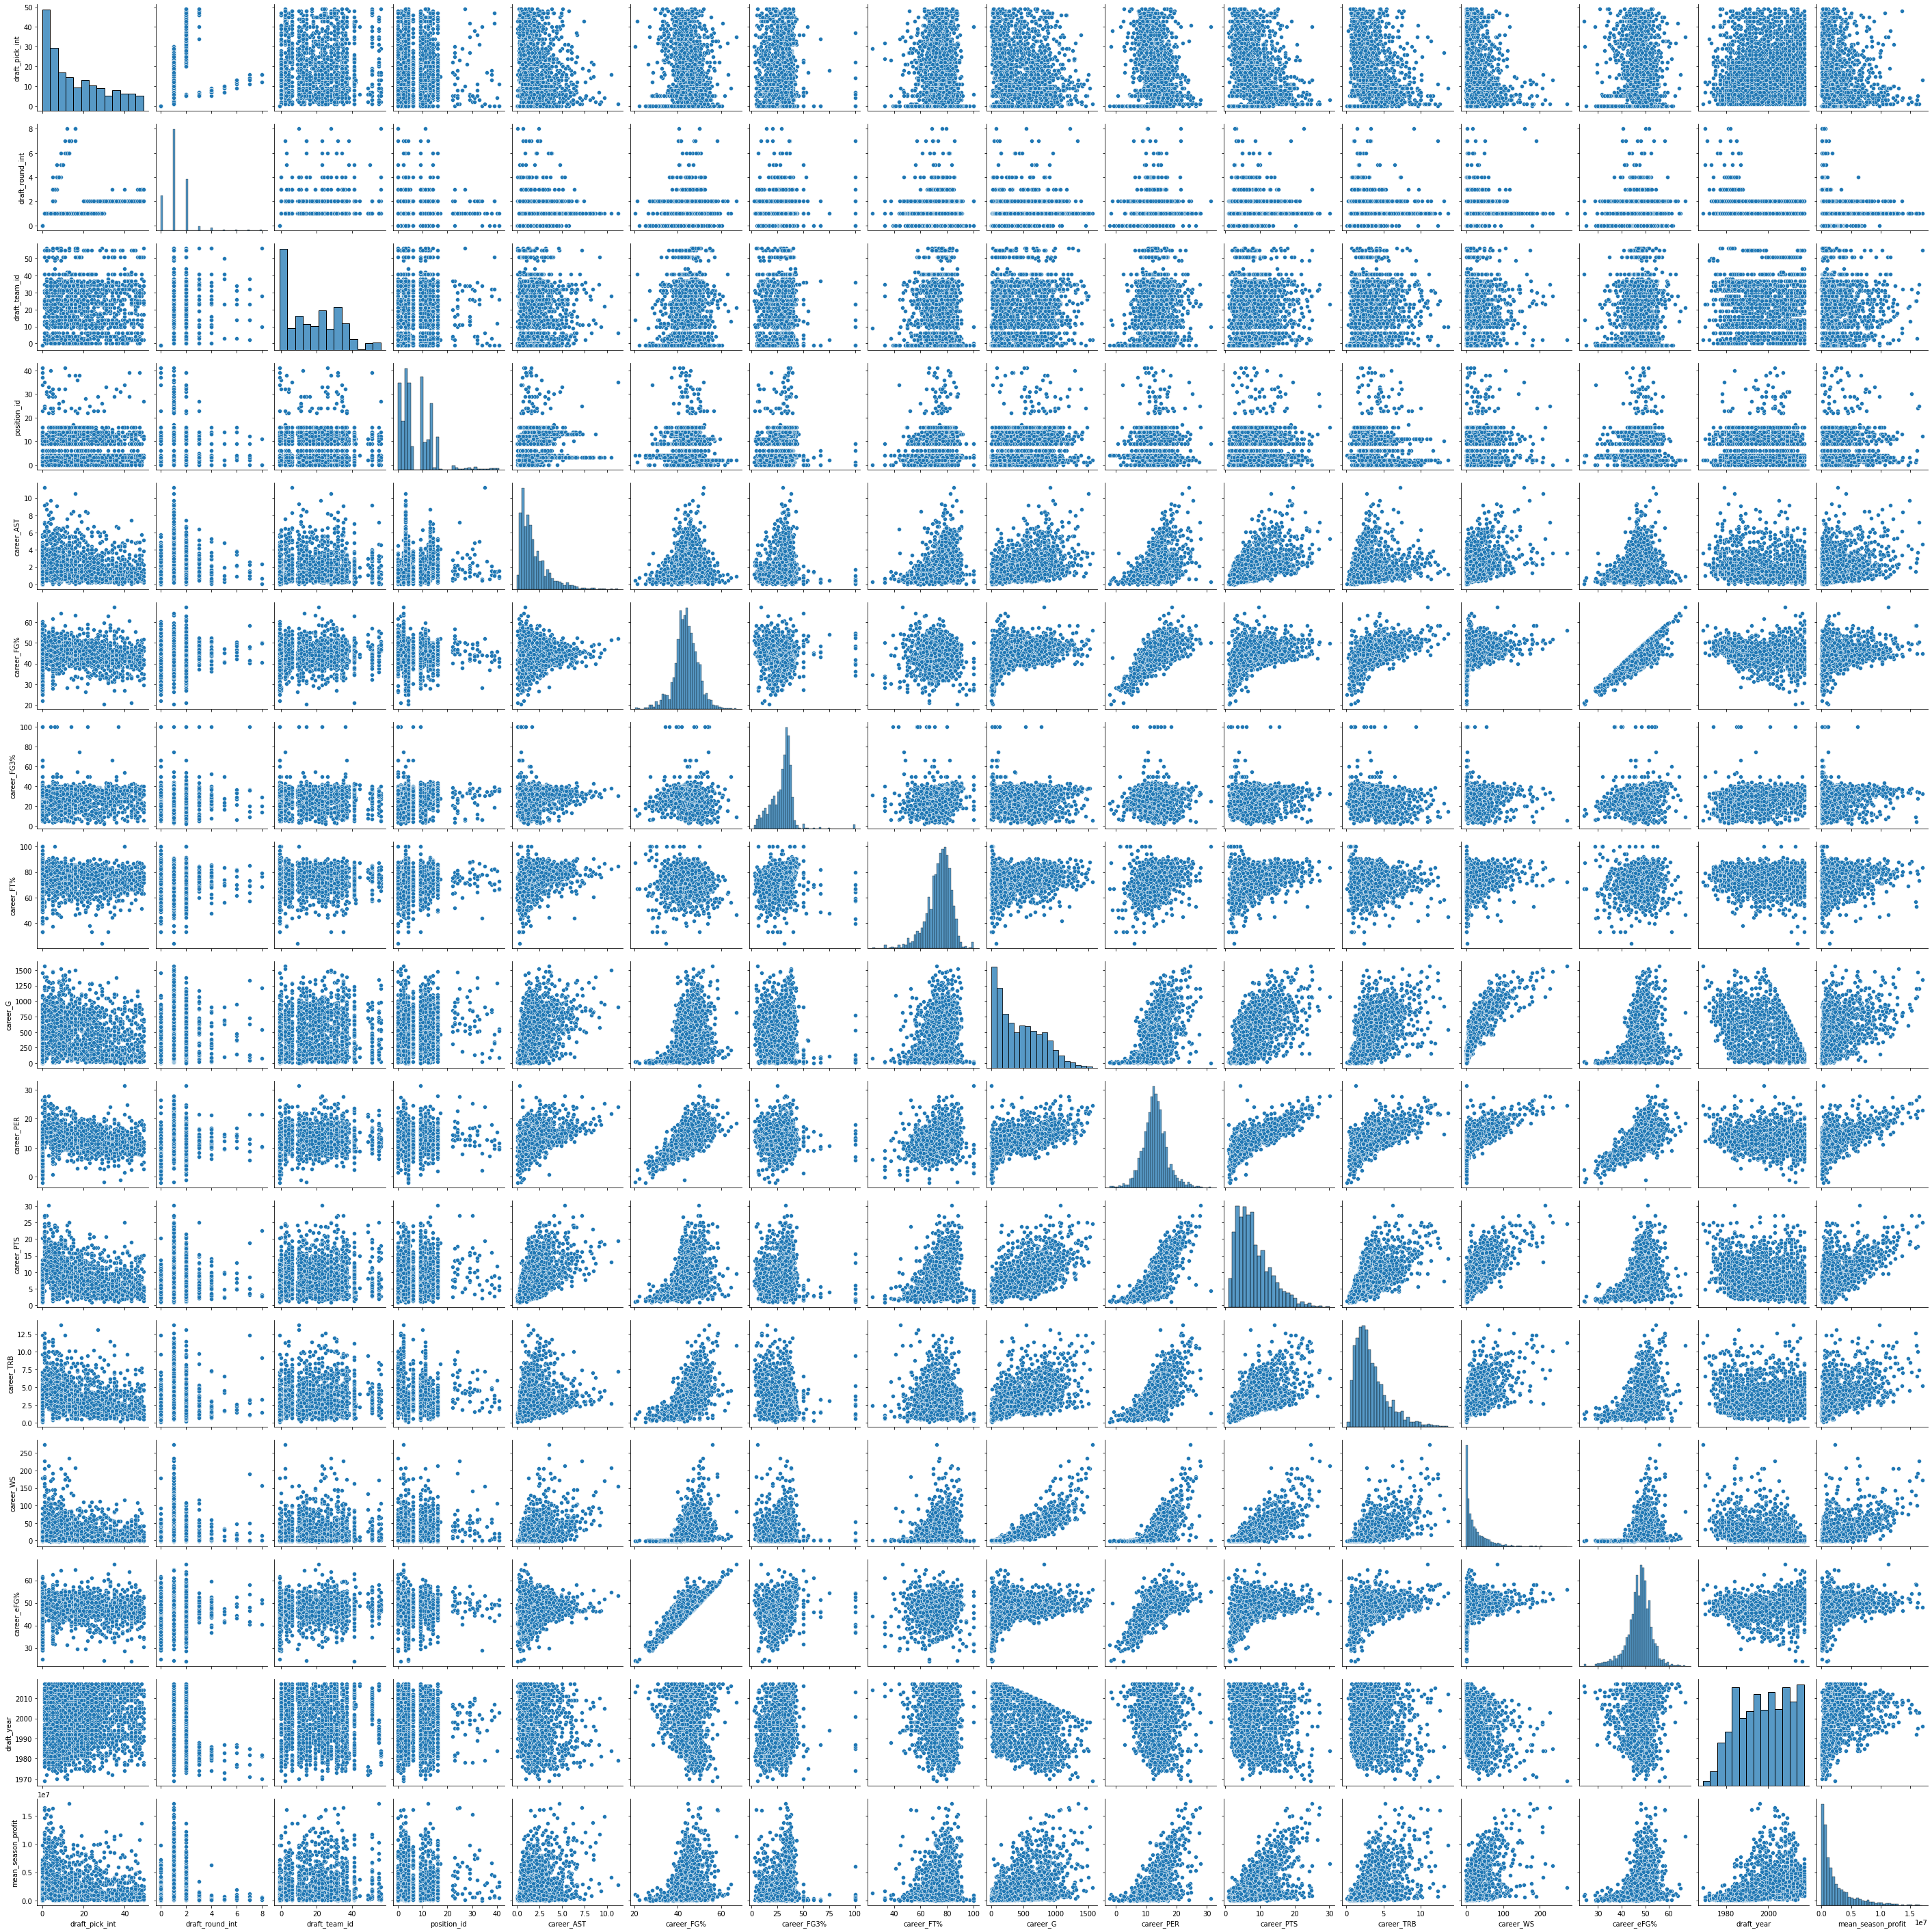

In [91]:
import seaborn as sns
cols = ['draft_pick_int',	'draft_round_int',	'draft_team_id',	'position_id',	'career_AST',	'career_FG%',	'career_FG3%',	'career_FT%',	'career_G',	'career_PER',	'career_PTS',	'career_TRB',	'career_WS',	'career_eFG%',	'college',	'draft_pick',	'draft_round',	'draft_team',	'draft_year',	'height',	'highSchool',	'name',	'position',	'shoots',	'weight','mean_season_profit']
sns.pairplot(players[cols])

Ahora seleccionamos los atributos del dataset cuya importancia buscamos evaluar

In [129]:
att = ['draft_pick_int',	'draft_round_int',	'draft_team_id',	'position_id',	'career_AST',	'career_FG%',	'career_FG3%',	'career_FT%',	'career_G',	'career_PER',	'career_PTS',	'career_TRB',	'career_WS',	'career_eFG%']
y = players['mean_season_profit']
X = players[att]

A continuacion, queda definida una funcion de evaluacion de regresion de algoritmos, donde tambien muestra una prediccion a partir de un dataset de verificacion

In [135]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

def RegEvaluation(model, ytest, xtest, nameindex, yname,totaldt, predict=True):
    ypred = model.predict(xtest)
    xtest['Pred_Y'] = model.predict(xtest)
    dt = pd.merge(totaldt,xtest,how = 'right')
    xtest.drop(['Pred_Y'],axis=1,inplace=True)
    dt = dt[[nameindex, yname,'Pred_Y']]
    dt.sort_values(by = yname, ascending = False,inplace=True)
    rmse = np.sqrt(mean_squared_error(ytest, ypred))
    r2 = r2_score(ytest, ypred)
    print('RMSE is', rmse)
    print('R squared is', r2)
    if predict:
        return dt.head(20)

Escalamos el valor de cada atributo con su maximo absoluto, tambien encontramos diversos notebooks donde escalaban con el minimo absoluto, entre otros metodos de escalar el dataset.

In [136]:
from sklearn.preprocessing import MaxAbsScaler

transformer = MaxAbsScaler().fit(X) 
newX = transformer.transform(X)
newX = pd.DataFrame(newX,columns = X.columns)

In [137]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) 
x_train_NEW, x_test_NEW, y_train_NEW, y_test_NEW = train_test_split(newX, y, test_size = 0.3) 

Evaluamos la importancia de cada atributo dentro de nuestro modelo, podemos ver que para un R^2 de 0.3846 el atributo mas importante "career_PTS"

RMSE is 2134664.995619761
R squared is 0.4450261018820286


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


[Text(0, 0.5, 'Variables'), Text(0.5, 0, 'Importance')]

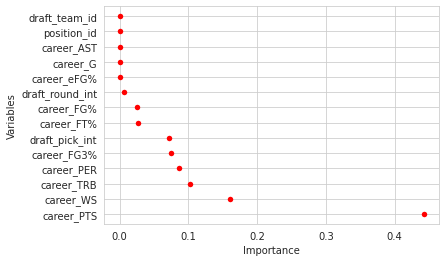

In [138]:
from sklearn import tree

clf = tree.DecisionTreeRegressor(max_depth=4, criterion="mse") 
dtree = clf.fit(X_train, y_train)

RegEvaluation(dtree, y_test, X_test, '_id', 'mean_season_profit', players)


sns.set_style("whitegrid")
from tabulate import tabulate
values = sorted(zip(X_train.columns, clf.feature_importances_), key=lambda x: x[1] * -1)
imp = pd.DataFrame(values,columns = ["Name", "Score"])
imp.sort_values(by = 'Score',inplace = True)
sns.scatterplot(x='Score',y='Name',linewidth=0,
                data=imp,s = 30, color='red').set(
    xlabel='Importance', 
    ylabel='Variables')

Pero este modelo podemos reentrenarlo con dataset escalado

In [139]:
dtree = clf.fit(x_train_NEW, y_train_NEW)
RegEvaluation(dtree, y_test_NEW, x_test_NEW, 
              '_id', 'mean_season_profit',players,predict=False)

RMSE is 2170526.035643173
R squared is 0.3416899393102705


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/pandas/core/reshape/merge.py:1127: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  UserWarning,
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Aplicamos el regresor **AdaBoost**, este regresor comienza ajustando un regresor en el conjunto de datos original y luego ajusta copias adicionales del regresor en el mismo conjunto de datos, pero donde los pesos de las instancias se ajustan según el error de la predicción actual.

In [142]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=500)
adaboost = reg.fit(X_train, y_train)

RegEvaluation(adaboost, y_test, X_test,'_id', 'mean_season_profit',players)

RMSE is 2034179.7297497797
R squared is 0.49604501541584034


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


_id  mean_season_profit        Pred_Y
86   anthoca01        1.612242e+07  7.714597e+06
244   paulch01        1.483311e+07  7.891140e+06
253  westbru01        1.378522e+07  8.226023e+06
124  aldrila01        1.282306e+07  7.601325e+06
348   wadedw01        1.280467e+07  4.909980e+06
144  arenagi01        1.222332e+07  6.781961e+06
293  davisan02        1.200318e+07  9.005463e+06
371  parsoch01        1.160852e+07  4.571709e+06
377  haywago01        1.133702e+07  6.891134e+06
324  lillada01        1.117559e+07  9.378262e+06
191  irvinky01        1.110966e+07  9.378262e+06
137  boozeca01        1.087882e+07  4.339699e+06
24   georgpa01        1.060242e+07  8.765296e+06
120  conlemi01        1.054475e+07  7.071798e+06
340  couside01        1.032645e+07  8.801172e+06
106   kiddja01        1.029638e+07  5.417244e+06
15   barneha02        1.005456e+07  4.953999e+06
277  thompkl01        8.904410e+06  6.519766e+06
196   reddmi01        8.859572e+06  7.142696e+06
395  bogutan01        8.759039e+06  4.770381e+06

Y corroboramos nuevamente la importancia de cada atributo dentro del dataset pero con un regresor con mayor R^2

[Text(0, 0.5, 'Variables'), Text(0.5, 0, 'Importance')]

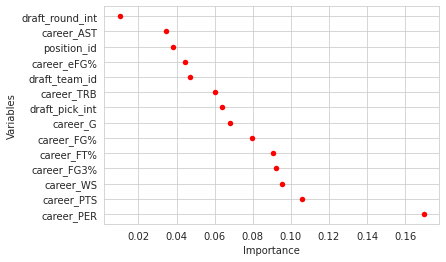

In [143]:
values = sorted(zip(x_train.columns, reg.feature_importances_), key = lambda x: x[1] * -1)
imp = pd.DataFrame(values,columns = ["Name", "Score"])
imp.sort_values(by = 'Score',inplace = True)
sns.scatterplot(x='Score',y='Name',linewidth=0,
                data=imp,s = 30, color='red').set(
    xlabel='Importance', 
    ylabel='Variables')

Con este ultimo resultado podemos confirmar que el atributo mas importante para la estimacion de los salarios de los jugadores de basquet es el "career_PER", traducido como "Player Efficiency Rating", estos resultados fueron comparados y verificados con otros usuarios de diferentes foros los cuales trabajaron sobre un dataset similar (en su analisis el resultado final fue que el atributo que mas importancia tenia eran los minutos jugados por partido, el cual nosotros no teniamos entre nuestros datos, pero el segundo mas importante fue el "PER")

A partir de un dataset con bastantes fijas corruptas, no aptas para la evaluacion y columnas con datos que poseen la necesidad de ser convertidos a atributo numerico, pudimos, con la ayuda del compañero Ivan Rango con quien trabajamos en conjunto, lograr limpiar el dataset y llegar a la conclusion de que: la importancia del atributo depende del tipo de regresor del que estemos trabajando y este resultado es mas optimo si se le ensambla con otro regresor y usando datasets con atributos estandarizados.